In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [37]:
def matrix_multiply(A, B):
    
    A = np.array(A)
    B = np.array(B)

    A_rows = len(A)
    A_columns = len(A[0])
    B_rows = len(B)
    B_columns = len(B[0])

    Output = np.zeros(shape=(A_rows, B_columns))

    for row in range(A_rows):
            for col_ in range(B_columns):
                for col in range(A_columns):    
                    for row_ in range(B_rows):
                        Output[row][col_] += ((A[row][col]) * (B[col][col_]))
                        break
    return Output

A = [(1,4,9), (7,1,9), (7,1,9)] 
B = [(1,2,9), (7,1,9), (7,1,9)]

print('Workshop function output:', matrix_multiply(A,B))
print('np.dot() output:', np.dot(A,B))

A = [(6,9), (7,2)] 
B = [(2,9), (7,7)]

print('Workshop function output:', matrix_multiply(A,B))
print('np.dot() output:', np.dot(A,B))


Workshop function output: [[ 92.  15. 126.]
 [ 77.  24. 153.]
 [ 77.  24. 153.]]
np.dot() output: [[ 92  15 126]
 [ 77  24 153]
 [ 77  24 153]]
Workshop function output: [[ 75. 117.]
 [ 28.  77.]]
np.dot() output: [[ 75 117]
 [ 28  77]]


# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [72]:
# 2.1
## [(1,2), (2,4)]
## [(2,4) , (4,8)]
## [(100,200), (200,400)]

# 2.2. 
## Matrix I is important as it effectively serve as the number '1' for matrices. Matrices mutliplied by I are unchanged.

# 2.3
##For all my attempts, I could not find evidence against this proof.


# 2.4
## [(1,0), (1,0)]

# 2.5
a = np.array( [ [1,1,1], [2,5, 0], [2,5,-1] ])
b = np.array([[6], [-4], [27]])

result = np.linalg.solve(a,b)
print('x:', result[0], 'y:', result[1], 'z:', result[2])


x: [63.] y: [-26.] z: [-31.]


# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [26]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

# est.summary()
# A quick lookat the summary shows that we should remove unneccessary variables. Such as those with high p-values, dummy variables, and the target variable

y = df['MEDV']
x = df[['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

#add the constant
x = sm.add_constant(x)

est = sm.OLS(y, x).fit()

coeffs = pd.read_html(est.summary().tables[1].as_html(),header=0,index_col=0)[0]
coeffs = coeffs['coef']
coeffs = coeffs.drop('const')

print('The R2 value:', est.rsquared)

print('The coefficients:', coeffs)




The R2 value: 0.7352631473231818
The coefficients: CRIM       -0.1141
ZN          0.0457
NOX       -16.4692
RM          3.8446
DIS        -1.5261
RAD         0.3155
TAX        -0.0127
PTRATIO    -0.9784
B           0.0097
LSTAT      -0.5281
Name: coef, dtype: float64


# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(1)
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)

est1 = sm.OLS(y, poly1.fit_transform(x)).fit()
est2 = sm.OLS(y, poly2.fit_transform(x)).fit()
est3 = sm.OLS(y, poly3.fit_transform(x)).fit()

sum1 = pd.read_html(est1.summary().tables[0].as_html(),header=0,index_col=0)[0]
sum2 = pd.read_html(est2.summary().tables[0].as_html(),header=0,index_col=0)[0]
sum3 = pd.read_html(est3.summary().tables[0].as_html(),header=0,index_col=0)[0]

print('With one polynomial feature:', sum1[4:6])
print('With two polynomial feature:', sum2[4:6])
print('With three polynomial feature:', sum3[4:6])

#From quick look at the AIC and BIC, 2 polynomial features creates the best fit.


With one polynomial feature:                   MEDV R-squared:   0.735
Dep. Variable:                           
No. Observations:  506       AIC:  3030.0
Df Residuals:      495       BIC:  3076.0
With two polynomial feature:                   MEDV R-squared:   0.898
Dep. Variable:                           
No. Observations:  506       AIC:  2658.0
Df Residuals:      440       BIC:  2937.0
With three polynomial feature:                   MEDV R-squared:   0.977
Dep. Variable:                           
No. Observations:  506       AIC:  2353.0
Df Residuals:      220       BIC:  3562.0


# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

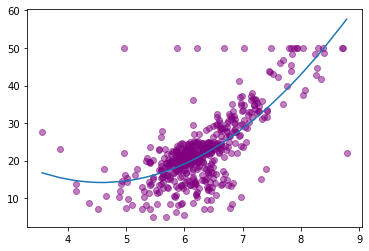

In [33]:
# df.corr()
#Although the strongest correlation is between MEDV and LSTAT, I will use RM because it is both strong and a more interesting predictor.

boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df = df.sort_values(by='RM')

y = df['MEDV']
x = df[['RM']]
x['RM_sq'] = x['RM']**2
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

yfit = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(x['RM'], y, alpha=0.5, color='purple')
ax.plot(x['RM'], yfit)

plt.show()
#Not great, but that is a linear regression plot.

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

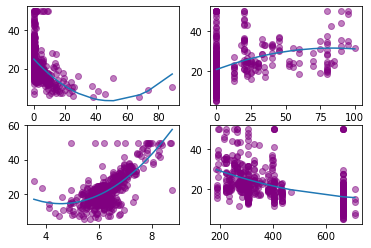

In [37]:
boston = load_boston()

def reg_plot_on_ax(feature, ax):
    df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
    df['MEDV'] = boston.target
    df = df.sort_values(by=feature)
    
    y = df.MEDV
    x = df[[feature]]
    x['feature_sq'] = x[feature]**2
    X = sm.add_constant(x)

    est = sm.OLS(y, X).fit()
    yfit = est.predict(X)

    return ax.scatter(x[feature], y, alpha=0.5, color='purple'), ax.plot(x[feature], yfit)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
reg_plot_on_ax('CRIM', ax1)
reg_plot_on_ax('ZN', ax2)
reg_plot_on_ax('RM', ax3)
reg_plot_on_ax('TAX', ax4)

plt.show()
#Clearly, not all these regressions are equally useful.